In [1]:
# load the needed python and basf2 libraries
import glob, sys, math, time, os
from array import array
import numpy as np
import math
import root_pandas
import pandas as pd
import scipy
from scipy.optimize import curve_fit 
import matplotlib
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/04


In [2]:
# load root file
df = root_pandas.read_root('./MergedPhotonsPair500to1500MeV.root', key='tree')
print('file loaded')

# show the saved variables
print(df.columns)

file loaded
Index(['__experiment__', '__run__', '__event__', '__candidate__',
       '__ncandidates__', '__weight__', 'px', 'py', 'pz', 'pt', 'p', 'E',
       'omega', 'firstSVDLayer', 'firstCDCLayer', 'firstPXDLayer', 'Mbc',
       'deltaE', 'dr', 'dphi', 'dcosTheta', 'x', 'y', 'z', 'distance',
       'isSignal', 'mcErrors', 'mcPDG', 'ep_px', 'ep_py', 'ep_pz', 'ep_pt',
       'ep_p', 'ep_E', 'ep_omega', 'ep_firstSVDLayer', 'ep_firstCDCLayer',
       'ep_firstPXDLayer', 'ep_isSignal', 'ep_mcErrors', 'ep_mcPDG', 'em_px',
       'em_py', 'em_pz', 'em_pt', 'em_p', 'em_E', 'em_omega',
       'em_firstSVDLayer', 'em_firstCDCLayer', 'em_firstPXDLayer',
       'em_isSignal', 'em_mcErrors', 'em_mcPDG'],
      dtype='object')


In [3]:
# seleziono i dati utili, che corrispondono a SVD, 
# con query praticamente filtri i dati ad una condizione che è quella scritta tra parentesi
# la variabile t mi serve per fare la scala di colori dopo

df_filtered = df.query("sqrt(x**2+y**2)>3 and sqrt(x**2+y**2)<20")
t = np.arange(len(df_filtered.x))
print(len(df_filtered.x))

1000190


In [4]:
#stessa cosa ma con un'altra condizione 

df_filteredphi = df.query("dr>3 and dr<5")
tphi = np.arange(len(df_filteredphi.x))
print(len(df_filteredphi.x))

140149


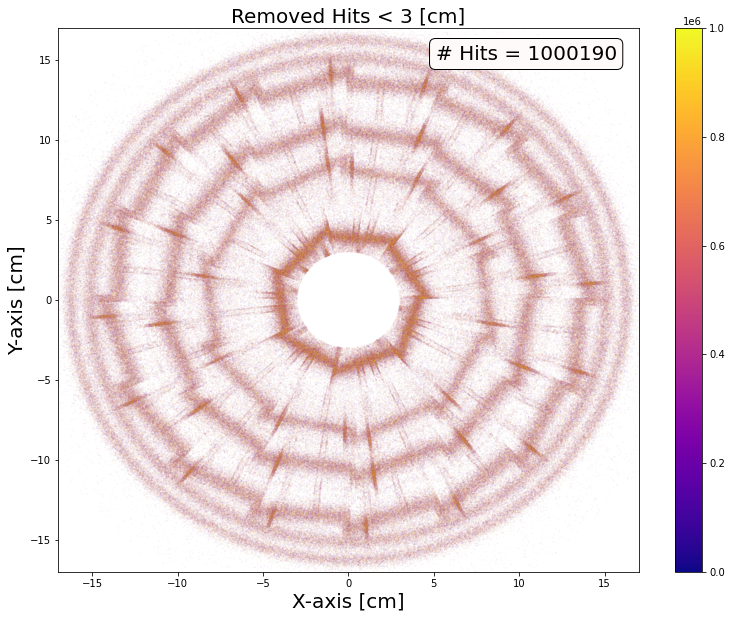

In [5]:
#qui disegno il primo scatterplot, 
#se vuoi usare come colore t come faccio io, deve essere una variabile con la stessa lunghezza di x e y, 
#guarda la cella sopra per vedere come si fa'

fig, ax = plt.subplots(figsize=(13, 10))
xyScatter = plt.scatter(df_filtered.x, df_filtered.y, s=0.0005, c=t, cmap='plasma')
plt.xlim(-17,17)
plt.ylim(-17,17)
plt.title("Removed Hits < 3 [cm]", fontsize=20)
plt.xlabel('X-axis [cm]', fontsize=20)
plt.ylabel('Y-axis [cm]', fontsize=20)

#qui creo la box in cui inserisco descrizioni, in questo caso solo il numero di hits

textstr = (r'# Hits = %s' % (len(df_filtered.x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.65, 0.97, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)

plt.colorbar()

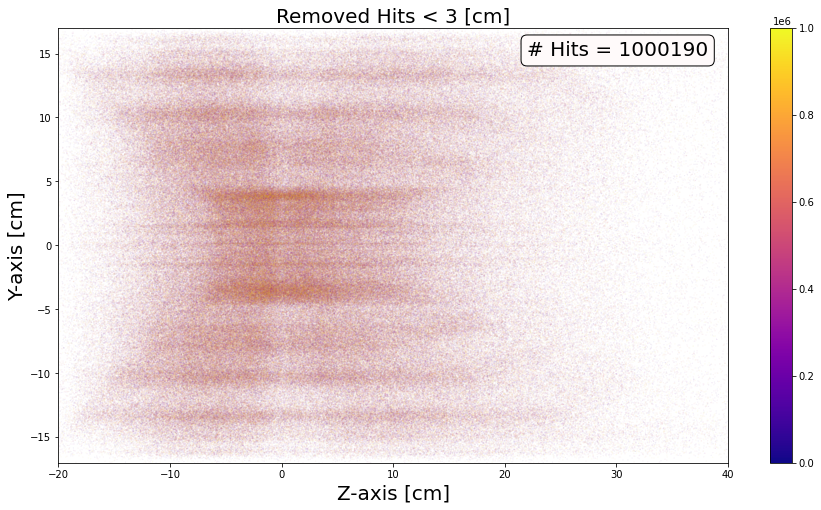

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
zyScatter = plt.scatter(df_filtered.z, df_filtered.y, s=0.0005, c=t, cmap='plasma')
plt.xlim(-20,40)
plt.ylim(-17,17)
plt.title("Removed Hits < 3 [cm]", fontsize=20)
plt.xlabel('Z-axis [cm]', fontsize=20)
plt.ylabel('Y-axis [cm]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filtered.x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.7, 0.97, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)
plt.colorbar()

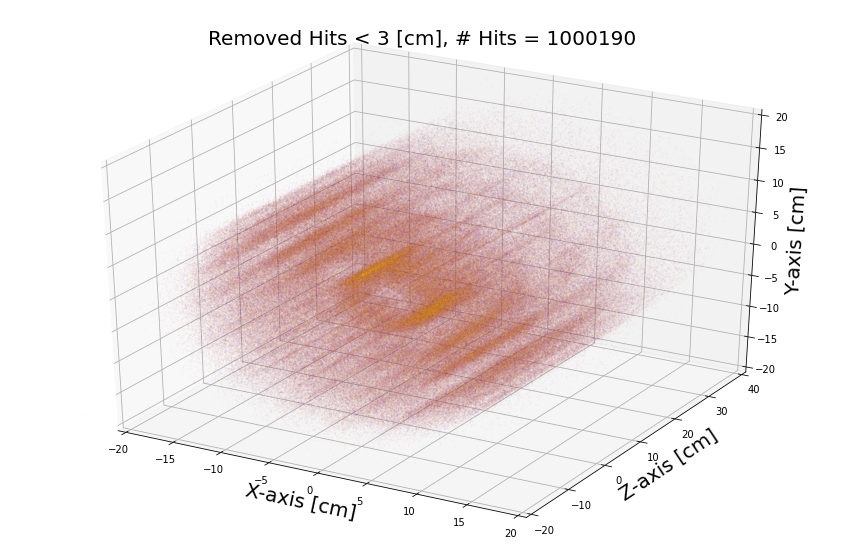

In [7]:

# qui faccio uno scatterplot 3D, quindi il procedimento è un po' diverso
# non c'è nella libreria matplotlib quindi devo usare la libreria ax

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

# Plot the values
xyzScatter = ax.scatter(df_filtered.x, df_filtered.z, df_filtered.y, s=0.001, c = t, cmap='plasma')
ax.set_xlim(-20,20)
ax.set_ylim(-20,40)
ax.set_zlim(-20,20)
plt.title("Removed Hits < 3 [cm], # Hits = %s " % (len(df_filtered.x)), fontsize=20)
ax.set_xlabel('X-axis [cm]', fontsize=20)
ax.set_ylabel('Z-axis [cm]', fontsize=20)
ax.set_zlabel('Y-axis [cm]', fontsize=20)

plt.show()

In [13]:
fig, ax = plt.subplots(figsize=(13, 10))
xyScatter = plt.scatter(df_filteredphi.z, df_filteredphi.dphi, s=0.01, c=tphi, cmap='plasma')
plt.xlim(-10,20)
plt.title("Layer 3 - data filtered 3 < r < 5 [cm]", fontsize=20)
plt.xlabel('Z-axis [cm]', fontsize=20)
plt.ylabel('phi angle [rad]', fontsize=20)
textstr = (r'# Hits = %s' % (len(df_filteredphi.x), ))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax.text(0.65, 0.97, textstr, transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=props)

plt.colorbar()

In [37]:
# seleziono i dati utili, che corrispondono a SVD, 
# con query praticamente filtri i dati ad una condizione che è quella scritta tra parentesi
# la variabile t mi serve per fare la scala di colori dopo

ladder1 = 2*math.pi/7
df_ladder1 = df.query("3<dr<5 and 0<dphi<%f" % ladder1)
t = np.arange(len(df_ladder1.x))
print(len(df_ladder1.x))

ladder2 = 2*(2*math.pi/7)
df_ladder2 = df.query("3<dr<5 and %f<dphi<%f" % (ladder1,ladder2))
t = np.arange(len(df_ladder2.x))
print(len(df_ladder2.x))

ladder3 = 3*(2*math.pi/7)
df_ladder3 = df.query("3<dr<5 and %f<dphi<%f" % (ladder2,ladder3))
t = np.arange(len(df_ladder3.x))
print(len(df_ladder3.x))

df_ladder6 = df.query("3<dr<5 and %f<dphi<%f" % (-ladder3, -ladder2))
t = np.arange(len(df_ladder6.x))
print(len(df_ladder6.x))

df_ladder5 = df.query("3<dr<5 and %f<dphi<%f" % (-ladder2, -ladder1))
t = np.arange(len(df_ladder6.x))
print(len(df_ladder6.x))

df_ladder4 = df.query("3<dr<5 and -%f<dphi<0" % ladder1)
t = np.arange(len(df_ladder4.x))
print(len(df_ladder4.x))

df_ladder7 = df.query("3<dr<5 anddphi>%f or dphi<-%f" % (ladder3, ladder3))
t = np.arange(len(df_ladder7.x))
print(len(df_ladder7.x))

19642
19810
20747
19995
19995
19874
100827


In [17]:
#qui c'è il primo istogramma, prima definisco la dimensione della figura e poi plotto gli istogrammi,
#in questo caso non uso dati filtrati e quindi il nome della variabile che voglio plottare è df.variabile e non df_filtered.variabile
#le altre celle sono uguali

plt.subplots(figsize=(8, 4))
plt.hist(df.ep_p, range=(0, 1.75), bins=100, alpha=0.5, facecolor="red", color="red", histtype='bar',density=True, label="$e^+$")
plt.hist(df.em_p, range=(0, 1.75), bins=100, alpha=0.5, facecolor="blue", color="blue", histtype='bar',density=True, label="$e^-$")
plt.title("$e^+$ and $e^-$ Momentum", fontsize=20)
plt.xlabel("GeV/c", fontsize=20)
plt.legend(loc='upper right')

In [18]:
plt.subplots(figsize=(8, 4))
plt.hist(df.ep_firstPXDLayer, range=(-2, 4), bins=12, alpha=0.5, color="red", histtype='bar', label="$e^+$")
plt.hist(df.em_firstPXDLayer, range=(-2, 4), bins=12, alpha=0.5, color="blue", histtype='bar', label="$e^-$")
plt.title("$e^+$ and $e^-$ PXD hits, # Hits = %s " % (len(df.ep_firstPXDLayer)), fontsize=20)
plt.legend(loc='upper right')

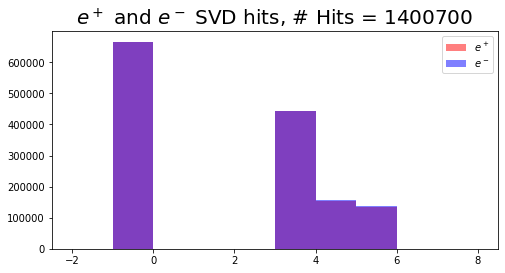

In [19]:
plt.subplots(figsize=(8, 4))
plt.hist(df.ep_firstSVDLayer, range=(-2, 8), bins=10, alpha=0.5, color="red", histtype='bar', label="$e^+$")
plt.hist(df.em_firstSVDLayer, range=(-2, 8), bins=10, alpha=0.5, color="blue", histtype='bar', label="$e^-$")
plt.title("$e^+$ and $e^-$ SVD hits, # Hits = %s " % (len(df.ep_firstPXDLayer)), fontsize=20)
plt.legend(loc='upper right')

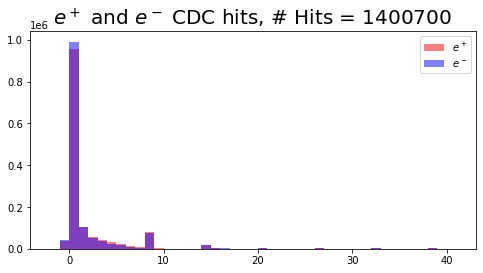

In [20]:
plt.subplots(figsize=(8, 4))
plt.hist(df.ep_firstCDCLayer, range=(-2, 41), bins=43, alpha=0.5, color="red", histtype='bar', label="$e^+$")
plt.hist(df.em_firstCDCLayer, range=(-2, 41), bins=43, alpha=0.5, color="blue", histtype='bar', label="$e^-$")
plt.title("$e^+$ and $e^-$ CDC hits, # Hits = %s " % (len(df.ep_firstPXDLayer)), fontsize=20)
plt.legend(loc='upper right')